### DNN MNIST 예제

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.14.0


In [5]:
# 버전 문법 오류 무시
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
# 예제 다운받기
# esc + m + y: 실행한 코드가 싹 다 제거 = kernel clear
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# y값이  one_hot 인코딩 값으로 출력
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


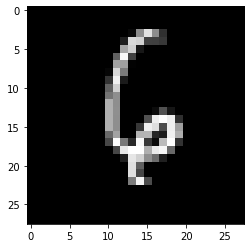

In [20]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

first_image = mnist.test.images[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()  

In [10]:
# train, test 데이터 셋 설정
# Xtr, Ytr = 변수, 종속변수
Xtr, Ytr = mnist.train.next_batch(5000) # 5000개 뽑아줌
Xte, Yte = mnist.test.next_batch(200)

# 행수가 몇 개인지 모르기 때문에 None 
xtr = tf.placeholder('float', [None, 784])
xte = tf.placeholder('float', [784])

In [11]:
# cost function L1: Mean Absolute Error 
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1) # indices = braodcasting 1열로 맞춰서 더해라

In [12]:
# 예측값 설정
pred = tf.argmin(distance, 0) # argmin : 가장 작은 인덱스 번호 출력
# 형태 : 0.2, 0.2, 0.01, 0.3, 0.4 ...  = 2 출력

# 정확도 초기화 
accuracy = 0.
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    # 초기화
    sess.run(init)
    for i in range(len(Xte)):
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i,:]})
        # 확률적으로 가장 큰 데이터 
        print('Test', i, 'Prediction:', np.argmax(Ytr[nn_index]), 'True Class:', np.argmax(Yte[i]))
        # one-hot-encoding
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
        
    print('Accuracy:', accuracy)

Test 0 Prediction: 6 True Class: 6
Test 1 Prediction: 7 True Class: 7
Test 2 Prediction: 2 True Class: 2
Test 3 Prediction: 8 True Class: 8
Test 4 Prediction: 6 True Class: 6
Test 5 Prediction: 6 True Class: 6
Test 6 Prediction: 6 True Class: 6
Test 7 Prediction: 1 True Class: 1
Test 8 Prediction: 1 True Class: 1
Test 9 Prediction: 0 True Class: 0
Test 10 Prediction: 6 True Class: 6
Test 11 Prediction: 5 True Class: 5
Test 12 Prediction: 8 True Class: 8
Test 13 Prediction: 8 True Class: 8
Test 14 Prediction: 2 True Class: 2
Test 15 Prediction: 8 True Class: 8
Test 16 Prediction: 1 True Class: 5
Test 17 Prediction: 1 True Class: 1
Test 18 Prediction: 1 True Class: 2
Test 19 Prediction: 0 True Class: 0
Test 20 Prediction: 7 True Class: 7
Test 21 Prediction: 0 True Class: 0
Test 22 Prediction: 2 True Class: 2
Test 23 Prediction: 9 True Class: 9
Test 24 Prediction: 6 True Class: 6
Test 25 Prediction: 3 True Class: 3
Test 26 Prediction: 9 True Class: 9
Test 27 Prediction: 8 True Class: 8
Te